In [1]:
from astropy.visualization import quantity_support
from screens import DynamicSpectrum, ConjugateSpectrum
import numpy as np
import astropy.units as u
#import newer version of astropy and try again
import astropy
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
astropy.__version__

'4.0'

In [2]:
#get the arrays to feed into the code
a = np.load('./ds_t_mjs_2021-10-07_033504.npz')
print (a)

/opt/python/3.7.3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/python/3.7.3/lib/python3.7/site-packages/matplotlib/image.py:877: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bbox = Bbox(np.array([[x1, y1], [x2, y2]]))


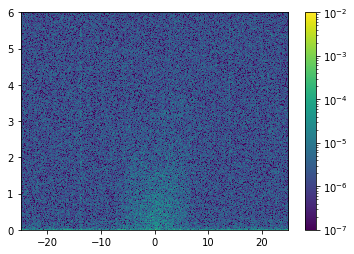

In [7]:
quantity_support()
time = a['t'] *u.s
frequency = a['f'] *u.MHz
#crop_spec_59299=spec_59299.select(freq_sel=[1150*u.MHz, 1840*u.MHz])
ds = DynamicSpectrum(a['ds'],
                     t= time[:, np.newaxis],
                     f= frequency ,
                    noise=1) 
                     #d_eff=0.345*u.kpc,
                    #mu_eff=18*u.mas/u.yr)


f_ref = frequency.mean()
ss = ConjugateSpectrum.from_dynamic_spectrum(ds)
plt.imshow(abs(ss.conjspec.T)**2, aspect='auto', norm = LogNorm(vmin= 1e-7, vmax=1e-2), 
          extent = [min(ss.fd).value, max(ss.fd).value, min(ss.tau).value, max(ss.tau).value])
plt.ylim(0,6)
plt.colorbar()
plt.show()

In [8]:
f_ref

<Quantity 1399.9875 MHz>

In [9]:
ds.t

<Quantity [[    0.        ],
           [   19.98242861],
           [   39.96485722],
           [   59.94728582],
           [   79.92971443],
           [   99.91214304],
           [  119.89457165],
           [  139.87700025],
           [  159.85942886],
           [  179.84185747],
           [  199.82428608],
           [  219.80671468],
           [  239.78914329],
           [  259.7715719 ],
           [  279.75400051],
           [  299.73642911],
           [  319.71885772],
           [  339.70128633],
           [  359.68371494],
           [  379.66614354],
           [  399.64857215],
           [  419.63100076],
           [  439.61342937],
           [  459.59585797],
           [  479.57828658],
           [  499.56071519],
           [  519.5431438 ],
           [  539.52557241],
           [  559.50800101],
           [  579.49042962],
           [  599.47285823],
           [  619.45528684],
           [  639.43771544],
           [  659.42014405],
           [  

In [10]:
ss.tau

<Quantity [-20.    , -19.9975, -19.995 , ...,  19.9925,  19.995 ,  19.9975] us>

In [11]:
nut = ConjugateSpectrum.from_dynamic_spectrum(ds, t=(frequency/f_ref)*ds.t,  fd=ss.fd.squeeze())

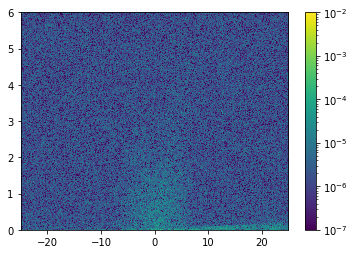

In [12]:
plt.imshow(abs(nut.conjspec.T)**2, aspect='auto', norm = LogNorm(vmin= 1e-7, vmax=1e-2), 
          extent = [min(nut.fd).value, max(nut.fd).value, min(nut.tau).value, max(nut.tau).value])
plt.ylim(0,6)
plt.colorbar()
